In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
import pandas as pd
file_path = "Intentional homicide victims by sex, counts and ra.xls"

df = pd.read_excel(file_path, skiprows=1, usecols="A:AC")

print(df.columns)


Index(['Region', 'Subregion', 'Country', 'Sex', 'Source', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023'],
      dtype='object')


#Data Cleaning

=> Remove empty rows and columns

In [79]:
print(df.shape)
df = df.iloc[:, :29]

print(df.shape)

(386, 29)
(386, 29)


=> Cleaning column names

In [80]:
# df.columns = [
#     str(int(float(col))) if str(col).replace('.', '').isdigit() else col
#     for col in df.columns
# ]

# print(df.columns[:10])


=> Reshaping

In [81]:
# wide-year format to long format
df_melted = df.melt(
    id_vars=["Region", "Subregion", "Country", "Sex", "Source"],
    var_name="Year",
    value_name="Value"
)

# Convert Year to integer
df_melted["Year"] = pd.to_numeric(df_melted["Year"], errors="coerce").astype("Int64")

# Drop missing values
df_melted = df_melted.dropna(subset=["Value"])

print("Shape after melting:", df_melted.shape)
df_melted.head()
print(df_melted.isnull().sum())

Shape after melting: (4695, 7)
Region       0
Subregion    0
Country      0
Sex          0
Source       0
Year         0
Value        0
dtype: int64


Renaming columns correctly

In [82]:
df_melted.rename(columns={"Value": "Homicide_Count"}, inplace=True)
df_melted.head(10)

# filter only valid 5 regions
valid_regions = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
df_melted = df_melted[df_melted["Region"].isin(valid_regions)]

print(df_melted["Region"].unique())
print("Shape after region filtering:", df_melted.shape)

['Africa' 'Americas' 'Asia' 'Europe' 'Oceania']
Shape after region filtering: (4695, 7)


Checking for duplicate values

In [83]:
# check and remove duplicate rows
print("Duplicates before:", df_melted.duplicated().sum())

df_melted = df_melted.drop_duplicates()

print("Duplicates after:", df_melted.duplicated().sum())


Duplicates before: 0
Duplicates after: 0


Final cleaned data

In [84]:
# Final cleaned dataset ready for EDA
df = df_melted.copy()

print("Cleaning complete. Final shape:", df.shape)
df.head()


Cleaning complete. Final shape: (4695, 7)


,Region,Subregion,Country,Sex,Source,Year,Homicide_Count
19,Africa,Sub-Saharan Africa,Mauritius,Female,MD/CTS/NSO/SDG,2000,11.375000
20,Africa,Sub-Saharan Africa,Mauritius,Male,MD/CTS/NSO/SDG,2000,14.625000
37,Americas,Latin America and the Caribbean,Anguilla,Female,MD,2000,0.000000
38,Americas,Latin America and the Caribbean,Anguilla,Male,MD,2000,1.000000
45,Americas,Latin America and the Caribbean,Bahamas,Female,MD/CTS/GSH 2023 Revision/NP,2000,16.444444


In [85]:
print(df)


        Region                        Subregion                       Country  \
19      Africa               Sub-Saharan Africa                     Mauritius   
20      Africa               Sub-Saharan Africa                     Mauritius   
37    Americas  Latin America and the Caribbean                      Anguilla   
38    Americas  Latin America and the Caribbean                      Anguilla   
45    Americas  Latin America and the Caribbean                       Bahamas   
...        ...                              ...                           ...   
9178    Europe                   Western Europe  Netherlands (Kingdom of the)   
9179    Europe                   Western Europe                   Switzerland   
9180    Europe                   Western Europe                   Switzerland   
9181   Oceania        Australia and New Zealand                     Australia   
9182   Oceania        Australia and New Zealand                     Australia   

         Sex               

In [86]:
# Calculate IQR
Q1 = df["Homicide_Count"].quantile(0.25)
Q3 = df["Homicide_Count"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier limits
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df["Homicide_Count"] < lower) | (df["Homicide_Count"] > upper)]
print("Outliers found:", outliers.shape[0])
outliers



Outliers found: 676


,Region,Subregion,Country,Sex,Source,Year,Homicide_Count
53,Americas,Latin America and the Caribbean,Brazil,Female,MD/DATASUS,2000,3743.000000
54,Americas,Latin America and the Caribbean,Brazil,Male,MD/DATASUS,2000,41600.000000
61,Americas,Latin America and the Caribbean,Colombia,Female,MD/CTS/GSH 2023 Revision,2000,1924.065959
62,Americas,Latin America and the Caribbean,Colombia,Male,MD/CTS/GSH 2023 Revision,2000,24614.934041
74,Americas,Latin America and the Caribbean,Ecuador,Male,MD/OAS/CTS/SDG,2000,1688.335900
...,...,...,...,...,...,...,...
8974,Americas,Latin America and the Caribbean,Mexico,Male,GSH 2019 Revision/NSO/CTS,2023,28243.000000
9011,Americas,Northern America,United States of America,Female,UNSDC/NP/CTS,2023,4359.000000
9012,Americas,Northern America,United States of America,Male,UNSDC/NP/CTS,2023,15437.000000
9083,Asia,Western Asia,Türkiye,Female,UNECE/CTS,2023,733.000000


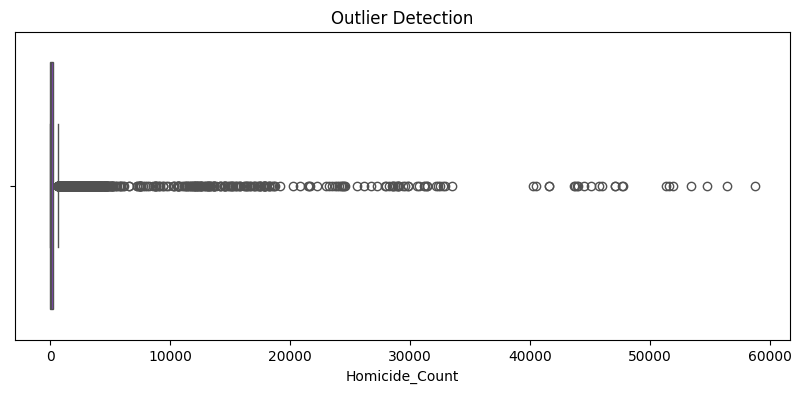

In [87]:
plt.figure(figsize=(10,4))
sns.boxplot(x="Homicide_Count", data=df,color="blueviolet")
plt.title("Outlier Detection")
plt.show()



Outlier countries based on Total Homicides (2000–2023):

        Region Country  Homicide_Count
6616  Americas  Brazil         58750.0
6230  Americas  Brazil         56465.0
5458  Americas  Brazil         54786.0
5844  Americas  Brazil         53467.0
5072  Americas  Brazil         51973.0
4686  Americas  Brazil         51591.0
7002  Americas  Brazil         51334.0
3914  Americas  Brazil         47777.0
4300  Americas  Brazil         47650.0
3528  Americas  Brazil         47131.0
1212  Americas  Brazil         47102.0
3142  Americas  Brazil         46042.0
826   Americas  Brazil         45787.0
2370  Americas  Brazil         45080.0
1598  Americas  Brazil         44535.0
440   Americas  Brazil         44052.0
2756  Americas  Brazil         43906.0
7774  Americas  Brazil         43780.0
1984  Americas  Brazil         43678.0
8160  Americas  Brazil         41644.0


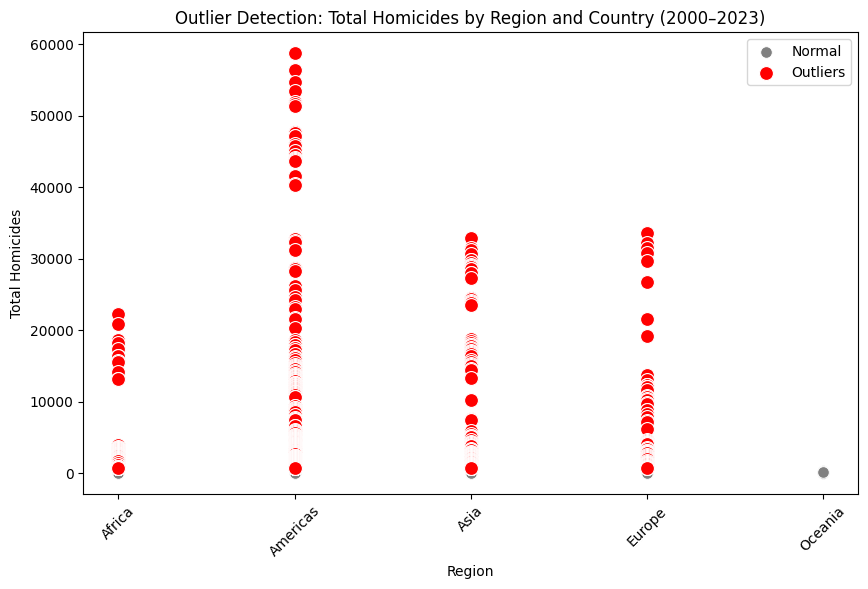

In [88]:

print("Outlier countries based on Total Homicides (2000–2023):\n")
outlier_countries = outliers.sort_values(by="Homicide_Count", ascending=False)
print(outlier_countries[["Region", "Country", "Homicide_Count"]].head(20))

plt.figure(figsize=(10,6))

sns.scatterplot(
    data=df,
    x="Region",
    y="Homicide_Count",
    s=70,
    color="gray",
    label="Normal"
)

sns.scatterplot(
    data=outlier_countries,
    x="Region",
    y="Homicide_Count",
    s=100,
    color="red",
    label="Outliers"
)

plt.title("Outlier Detection: Total Homicides by Region and Country (2000–2023)")
plt.ylabel("Total Homicides")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [89]:
# Removing outliers
print("Before removing outliers:", df.shape)
df_no_outliers = df[(df["Homicide_Count"] >= lower) & (df["Homicide_Count"] <= upper)]
print("After removing outliers:", df_no_outliers.shape)
df = df_no_outliers

Before removing outliers: (4695, 7)
After removing outliers: (4019, 7)


STATS

In [90]:
df.describe(include='all')


,Region,Subregion,Country,Sex,Source,Year,Homicide_Count
count,4019,4019,4019,4019,4019,4019.0,4019.000000
unique,5,17,154,2,87,<NA>,NaN
top,Europe,Latin America and the Caribbean,Republic of Moldova,Female,CTS,<NA>,NaN
freq,1788,994,48,2147,488,<NA>,NaN
mean,NaN,NaN,NaN,NaN,NaN,2012.290371,102.561508
std,NaN,NaN,NaN,NaN,NaN,6.324401,144.509397
min,NaN,NaN,NaN,NaN,NaN,2000.0,0.000000
25%,NaN,NaN,NaN,NaN,NaN,2007.0,11.000000
50%,NaN,NaN,NaN,NaN,NaN,2013.0,38.000000
75%,NaN,NaN,NaN,NaN,NaN,2018.0,128.000000


#UNIVARIATE ANALYSIS

1. Distribution of homicide counts

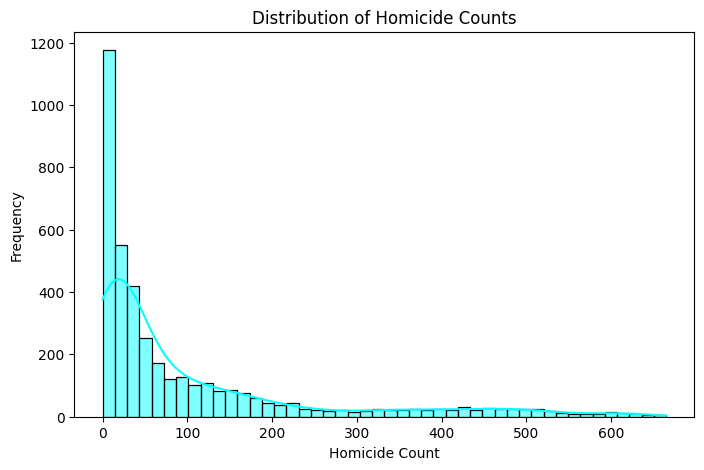

In [91]:
plt.figure(figsize=(8,5))
sns.histplot(df['Homicide_Count'], kde=True, color='aqua')
plt.title('Distribution of Homicide Counts')
plt.xlabel('Homicide Count')
plt.ylabel('Frequency')
plt.show()


2. Distribution of homicide counts by Sex

/tmp/ipython-input-3829534881.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='dark')


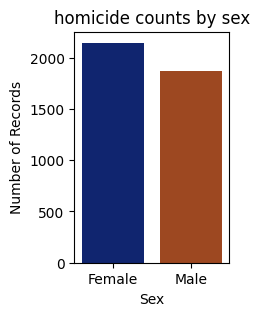

In [92]:
plt.figure(figsize=(2,3))
sns.countplot(x='Sex', data=df, palette='dark')
plt.title('homicide counts by sex')
plt.xlabel('Sex')
plt.ylabel('Number of Records')
plt.show()


3. Distribution of records by Region

/tmp/ipython-input-3676898913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=df, palette='muted')


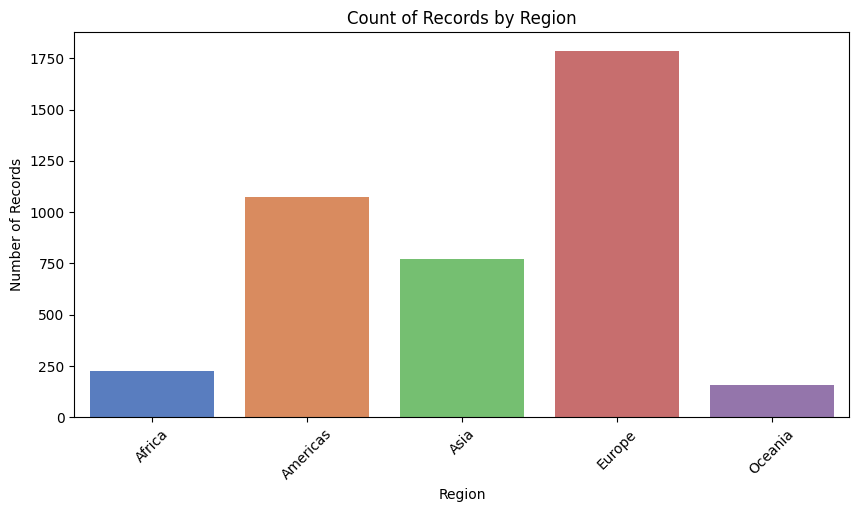

In [93]:
plt.figure(figsize=(10,5))
sns.countplot(x='Region', data=df, palette='muted')
plt.title('Count of Records by Region')
plt.xlabel('Region')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.show()


# BIVARIATE ANALYSIS

1. Homicide count by Region and Sex

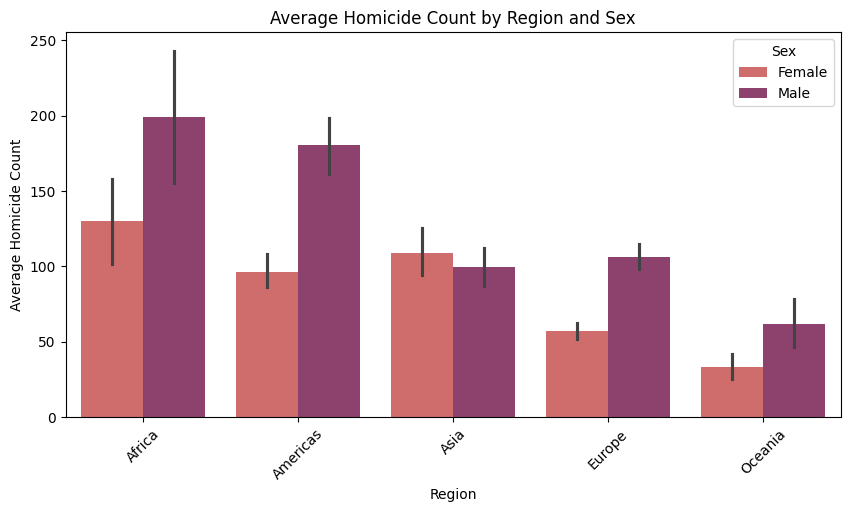

In [94]:
plt.figure(figsize=(10,5))
sns.barplot(x='Region', y='Homicide_Count', hue='Sex', data=df, palette='flare')
plt.title('Average Homicide Count by Region and Sex')
plt.xlabel('Region')
plt.ylabel('Average Homicide Count')
plt.xticks(rotation=45)
plt.show()


2. Trend of homicide counts over the years

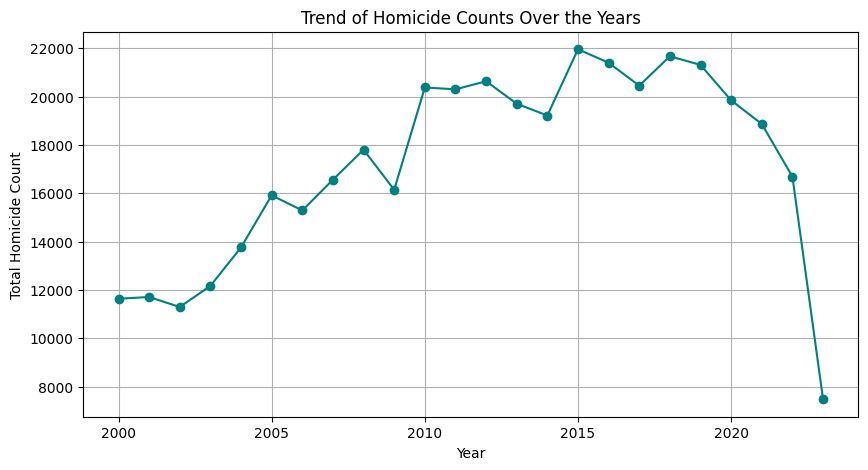

In [95]:
plt.figure(figsize=(10,5))
df.groupby('Year')['Homicide_Count'].sum().plot(marker='o',color="teal")
plt.title('Trend of Homicide Counts Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Homicide Count')
plt.grid(True)
plt.show()


#MULTIVARIATE ANALYSIS

1. Top 10 countries with highest homicide counts

/tmp/ipython-input-2429764694.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Homicide_Count', y='Country', data=top_countries, palette='Reds_r')


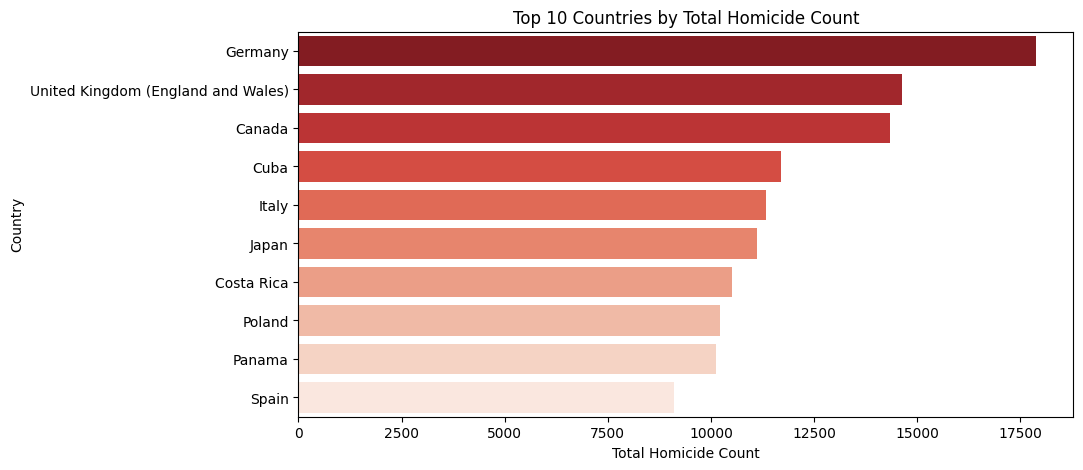

In [96]:
top_countries = (
    df.groupby('Country')['Homicide_Count']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.barplot(x='Homicide_Count', y='Country', data=top_countries, palette='Reds_r')
plt.title('Top 10 Countries by Total Homicide Count')
plt.xlabel('Total Homicide Count')
plt.ylabel('Country')
plt.show()





2. Heatmap — Homicides by Region and Year

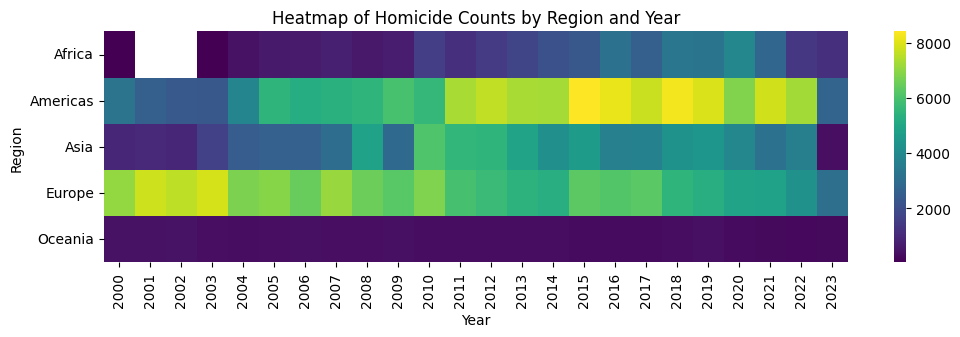

In [97]:
pivot_df = df.pivot_table(
    values='Homicide_Count',
    index='Region',
    columns='Year',
    aggfunc='sum'
)

plt.figure(figsize=(12,3))
sns.heatmap(pivot_df, cmap='viridis', linewidths=0)
plt.title('Heatmap of Homicide Counts by Region and Year')
plt.xlabel('Year')
plt.ylabel('Region')
plt.show()
